*—Created by Pallavi Prasad for Mindseed Ltd. (last modified in August 2020)—*

**Accessing the data**

In [ ]:
#Install all the dependent libraries as required for eo-learn
!pip install sentinelhub
!pip install rasterio
!pip install folium
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
# !pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes 
!pip install osmnx==0.14.1
# !apt-get -qq install python-cartopy python3-cartopy
!apt install python-cartopy python3-cartopy --quiet



     |████████████████████████████████| 184kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 8.1MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
  Created wheel for sentinelhub: filename=sentinelhub-3.0.4-cp36-none-any.whl size=187572 sha256=04722edff6f332262ed5962a64e5a44b94cffc97d9047dec39ad9e8a59e8e1ab
  Stored in directory: /root/.cache/pip/wheels/94/b9/7f/d67a9c14ba62aded84d7c32d5cf89affa27e337ace70d30fbb
  Created wheel for utm: filename=utm-0.5.0-cp36-none-any.whl size=5903 sha256=78e7ab67ed9cacd94c779b01aa8141bfaf594b48c6675dd78803112b63530e46
  Stored in directory: /root/.cache/pip/wheels/22/85/c2/314ffed39b8e02ca623e9b7d2ad7fcf3f8544a0e77c096be76
Successfully built sentinelhub utm
     |████████████████████████████████| 18.2MB 1.5MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is

In [ ]:
# Now install eo-learn package

!pip install eo-learn
!pip install eo-learn-visualization[FULL]

     |████████████████████████████████| 10.5MB 4.1MB/s 
     |████████████████████████████████| 133kB 38.0MB/s 
     |████████████████████████████████| 931kB 32.7MB/s 
     |████████████████████████████████| 42.6MB 102kB/s 
     |████████████████████████████████| 4.8MB 36.4MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
  Created wheel for eo-learn: filename=eo_learn-0.7.6-cp36-none-any.whl size=6338 sha256=ff124bbf549e717bd8c120f05ed304ff2448c6559f68614829438ddfbd09e080
  Stored in directory: /root/.cache/pip/wheels/b8/d0/18/ef6001a35b842c704a0299e636dfd4db44b676b78cbd0df2b8
  Created wheel for eo-learn-core: filename=eo_learn_core-0.7.5-cp36-none-any.whl size=42789 sha256=5adbe9addb2a0e061506e075f051cb123b308efa1fdbf568a0aa41122617ae74
  Stored in directory: /root/.cache/pip/wheels/0d/a2/7b/13457c74270b187fbe7e433b4db00bdf8d5b2f38ce9921d00f
  Created wheel for eo-learn-coregistration: filename=eo_learn_coregistration-0.7.3-cp36-none-any.whl size=10948 sha256=0f9f6d76142ec

In [ ]:
#Install all the packages

import folium
import os
import numpy as np

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import osmnx as ox
import seaborn as sns
import pandas.util.testing as tm

from shapely.geometry import MultiPolygon, Polygon
import rasterio as rio
from rasterio.plot import show
import rasterio.mask
import fiona
import cartopy

import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Install eo-learn packages
from sentinelhub import BBox, CRS, DataSource, MimeType, SentinelHubRequest, SHConfig

from eolearn.core import SaveTask, LoadTask, FeatureType, LinearWorkflow, Dependency
from eolearn.io import SentinelHubInputTask, SentinelHubDemTask, SentinelHubInputBase, get_available_timestamps
#  S2L1CWCSInput, AddSen2CorClassificationFeature, DEMWCSInput, S2L2AWCSInput, L8L1CWCSInput


**Credentials-connection to sentinelhub**

In [ ]:
#SentinelHub credentials
INSTANCE_ID = ''
CLIENT_ID = ''
CLIENT_SECRET = ''

In [ ]:
config = SHConfig()

if CLIENT_ID and CLIENT_SECRET and INSTANCE_ID:
    config.instance_id = INSTANCE_ID
    config.sh_client_id = CLIENT_ID
    config.sh_client_secret = CLIENT_SECRET

if config.sh_client_id == '' or config.sh_client_secret == '' or config.instance_id == '':
    print("Warning! To use Sentinel Hub services, please provide the credentials (client ID and client secret).")

**General** **Parameters**

*a) Identify Area of Interest*

In [ ]:
#Get area of interest

point = (19.3709479,-104.0951888) # Pena Colorada, Mexico 

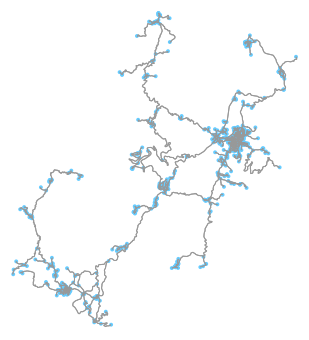

(<Figure size 414.424x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbf7835eb70>)

In [ ]:
# Plot the graph of the point location

graph = ox.graph_from_point(point, dist=10000, dist_type='bbox', network_type='all', simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=True, custom_filter=None)
ox.plot_graph(graph)

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# os.getcwd()
os.chdir("/content/drive/My Drive/Colab Notebooks")


In [ ]:
# convert the garph into geodataframe
#Save graph nodes and edges to disk as layers in a GeoPackage file.

ox.io.save_graph_geopackage(graph, filepath="/content/drive/My Drive/Colab Notebooks/mine_mexico.gpkg", encoding='utf-8')

In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"

 bhk.gpkg
 BHK_OSI.html
 BHK_OSI.png
'Bhurkunda_Sentinel Satellite Imagery analysis with eo-learn-io  .ipynb'
'Copy of ee-api-colab-setup.ipynb'
'Copy of Retrieving OSM.ipynb'
'Copy of RS-Python.ipynb'
'Copy of Scihub_copernicus_data_access.ipynb'
 DEM.png
'Eolearn Packages Test.ipynb'
 eThekwini_shapefile
 eThekwini_za.gpkg
'Exploring DEM_Test.ipynb'
'Google Earth Engine with Python_Classification.ipynb'
 io_bhk
 io_eThekwini
 io_penacolorada
 ireland-and-northern-ireland-latest-free.shp.zip
 mine_mexico.gpkg
 natural_earth_vector.gpkg
 NDVI_eThekwini.png
 NDVI.tif
 NDVI.tiff
 RGB_Dublin_streets.tiff
 RGB_eThekwini_masked.tif
 RGB_eThekwini.tiff
 RGB_masked.tif
 RGB.tiff
 S2A_MSIL2A_20200601T113331_N0214_R080_T29UPV_20200601T123416.SAFE
 S2A_MSIL2A_20200601T113331_N0214_R080_T29UPV_20200601T123416.zip
 S2A_MSIL2A_20200613T170901_N0214_R112_T14QLH_20200613T225605.zip
 S2B_MSIL2A_20200530T114349_N0214_R123_T29UNT_20200530T141830.SAFE
 S2B_MSIL2A_20200530T114349_N0214_R123_T29UNT_2020053

In [ ]:
#Read GeoPackage file.
penacolorada = gpd.read_file('mine_mexico.gpkg')
penacolorada

,y,x,osmid,highway,geometry
0,19.313903,-104.085131,6481039360,None,POINT (-104.08513 19.31390)
1,19.314228,-104.086536,6481039367,None,POINT (-104.08654 19.31423)
2,19.300529,-104.157180,3803904010,None,POINT (-104.15718 19.30053)
3,19.369231,-104.052937,3807504405,None,POINT (-104.05294 19.36923)
4,19.422922,-104.106014,6478506016,None,POINT (-104.10601 19.42292)
...,...,...,...,...,...
795,19.315764,-104.086014,6481039339,None,POINT (-104.08601 19.31576)
796,19.315918,-104.085093,6481039342,None,POINT (-104.08509 19.31592)
797,19.314903,-104.086332,6481039356,None,POINT (-104.08633 19.31490)
798,19.300373,-104.156446,3803903997,None,POINT (-104.15645 19.30037)


In [ ]:
# get the bbox
footprint= penacolorada.total_bounds 
footprint

array([-104.185214 ,   19.2814005, -104.0135497,   19.4599526])

In [ ]:
# Locate the footprint on the map using folium; Plot and Visualize the area of interest in open street map

m = folium.Map(
   location=(19.3709479,-104.0951888),
   zoom_start=12,
   tiles='OpenStreetMap',
   attr='Mapbox attribution')
# folium.map.FitBounds([-100.2424189,20.6374696,-100.0503793,20.814552]).add_to(m)
folium.GeoJson(landuse_projected).add_to(m)
m

**Define Tasks**

In [ ]:
#Define ROI BBOX and time interval
#Get the coordinates at geojson.io by selecting add bboxes from the menu and pick area of interest and copy paste your coordinates below
#region of interest

roi_bbox = BBox(bbox=[-104.185214 ,   19.2814005, -104.0135497,   19.4599526], crs=CRS.WGS84)  # Pena Colorada,Queretaro,Mexico coordinates
# time interval of downloaded data

time_interval = ('2020-05-01', '2020-07-23')

# maximal cloud coverage (based on Sentinel-2 provided tile metadata)
maxcc = .10

# resolution of the request (in metres)
resolution = 20


# time difference parameter (minimum allowed time difference; if two observations are closer than this, they will be mosaicked into one observation)
time_difference = datetime.timedelta(hours=2)

**Tasks**

In [ ]:
#The input_task will download all 13 Sentinel-2 bands, together with dataMask. 
#For all possible bands that can be downloaded from Sentinel-2 data, please see Sentinel Hub documentation.

input_task = SentinelHubInputTask(
    data_source=DataSource.SENTINEL2_L1C,
    bands=['B01','B02','B03','B04','B05','B06','B07','B08','B8A','B09','B10','B11','B12'],
    bands_feature=(FeatureType.DATA, 'L1C_data'),
    additional_data=[(FeatureType.MASK, 'dataMask')],
    resolution=resolution,
    maxcc=maxcc,
    time_difference=time_difference,
    config=config,
    max_threads=3
)

*Task for Sentinel-2 L2A and SCL data*

In [ ]:
#With SentinelHubInputTask it is possible to request both L2A and SCL data in one go, optimised for smallest processing unit costs.
add_l2a_and_scl = SentinelHubInputTask(
    data_source=DataSource.SENTINEL2_L2A,
    bands=['B01','B02','B03','B04','B05','B06','B07','B08','B8A','B09','B11','B12'],
    bands_feature=(FeatureType.DATA, 'L2A_data'),
    additional_data=[(FeatureType.MASK, 'SCL')],
    resolution=resolution,
    maxcc=maxcc,
    time_difference=time_difference,
    config=config,
    max_threads=3
)

*Task for retrieving NDVI and NDWI indices*

In [ ]:
class SentinelHubCustomTask(SentinelHubInputBase):

    def __init__(self, evalscript, feature, data_source=DataSource.SENTINEL2_L1C, size=None, resolution=None,
                 maxcc=1., time_difference=None, mosaicking_order='mostRecent', config=None, cache_folder=None, max_threads=None):

        super().__init__(
            data_source=data_source, size=size, resolution=resolution, cache_folder=cache_folder, config=config, max_threads=max_threads
        )

        feature_parser = self._parse_features(
            feature,
            default_feature_type=FeatureType.DATA,
            allowed_feature_types=[FeatureType.DATA]
        )
        self.evalscript = evalscript
        self.feature = next(feature_parser())
        self.maxcc = maxcc
        self.time_difference = dt.timedelta(seconds=1) if time_difference is None else time_difference
        self.mosaicking_order = mosaicking_order

    def _build_requests(self, bbox, size_x, size_y, timestamp, time_interval):
        dates = [(date - self.time_difference, date + self.time_difference) for date in timestamp]
        return [self._create_sh_request(date1, date2, bbox, size_x, size_y) for date1, date2 in dates]

    def _create_sh_request(self, date_from, date_to, bbox, size_x, size_y):
        return SentinelHubRequest(
            evalscript=self.evalscript,
            input_data=[
                SentinelHubRequest.input_data(
                    data_source=self.data_source,
                    time_interval=(date_from, date_to),
                    mosaicking_order=self.mosaicking_order,
                    maxcc=self.maxcc
                )
            ],
            responses=[SentinelHubRequest.output_response('default', MimeType.TIFF)],
            bbox=bbox,
            size=(size_x, size_y),
            data_folder=self.cache_folder,
            config=self.config
        )

    def _get_timestamp(self, time_interval, bbox):
        return get_available_timestamps(bbox=bbox, time_interval=time_interval, data_source=self.data_source,
                                        maxcc=self.maxcc, time_difference=self.time_difference, config=self.config)

    def _extract_data(self, eopatch, images, shape):
        data = np.array(images)
        print(f'shape = {shape}, ndim = {data.ndim}, len(images)={len(images)}')
        if data.ndim == 3:
            data = data[..., np.newaxis]
        eopatch[self.feature] = data

    def _add_meta_info(self, eopatch):
        eopatch.meta_info['maxcc'] = self.maxcc
        eopatch.meta_info['time_difference'] = self.time_difference
        eopatch.meta_info['mosaicking_order'] = self.mosaicking_order

In [ ]:
indices_evalscript = """
    //VERSION=3

    function setup() {
        return {
            input: ["B03","B04","B08"],
            output:{
                bands: 2,
                sampleType: SampleType.FLOAT32
            }
        }
    }

    function evaluatePixel(sample) {
        let ndvi = index(sample.B08, sample.B04)
        let ndwi = index(sample.B03, sample.B08)
        return [ndvi, ndwi];
    }
"""

In [ ]:
# Add tasks to add two indices: ndvi and ndwi
add_indices = SentinelHubCustomTask(evalscript=indices_evalscript, feature='indices',
                                    resolution=resolution, maxcc=maxcc, time_difference=time_difference, config=config)

*Task for Digital Elevation Model Data*


In [ ]:
add_dem = SentinelHubDemTask('dem', resolution=resolution, config=config)

*Task for saving the  eopatch*

In [ ]:
save = SaveTask('io_penacolorada', overwrite_permission=2, compress_level=1)

**Run workflow**

In [ ]:
workflow = LinearWorkflow(input_task, add_indices, add_l2a_and_scl, add_dem, save)

result = workflow.execute({
    input_task: {'bbox': roi_bbox, 'time_interval': time_interval},
    save: {'eopatch_folder': 'eopatch'}
})

shape = (10, 993, 896), ndim = 4, len(images)=10


*Check contents of eopatch*

In [ ]:
eopatch = result.eopatch()
eopatch

EOPatch(
  data: {
    L1C_data: numpy.ndarray(shape=(10, 993, 896, 13), dtype=float32)
    L2A_data: numpy.ndarray(shape=(10, 993, 896, 12), dtype=float32)
    indices: numpy.ndarray(shape=(10, 993, 896, 2), dtype=float32)
  }
  mask: {
    SCL: numpy.ndarray(shape=(10, 993, 896, 1), dtype=uint8)
    dataMask: numpy.ndarray(shape=(10, 993, 896, 1), dtype=uint8)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {
    dem: numpy.ndarray(shape=(993, 896, 1), dtype=int16)
  }
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    maxcc: 0.1
    mosaicking_order: 'mostRecent'
    service_type: 'processing'
    size_x: 896
    size_y: 993
    time_difference: datetime.timedelta(0, 7200)
    time_interval: None
  }
  bbox: BBox(((-104.185214, 19.2814005), (-104.0135497, 19.4599526)), crs=CRS('4326'))
  timestamp: [datetime.datetime(2020, 5, 2, 17, 38, 31), ..., datetime.datetime(2020, 7, 21, 17, 38, 36)], length=10
)

#Plot Results

Sentinel-2 L1C RGB bands

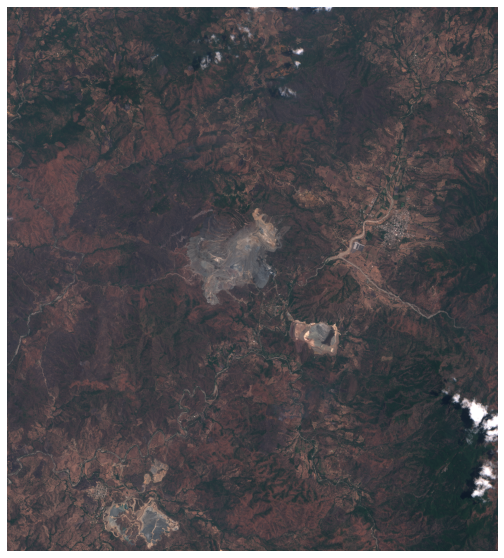

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.clip(eopatch.data['L1C_data'][3][..., [3,2,1]] * 2.5, 0, 1), vmin=0, vmax=1);
plt.axis(False);

NDVI data

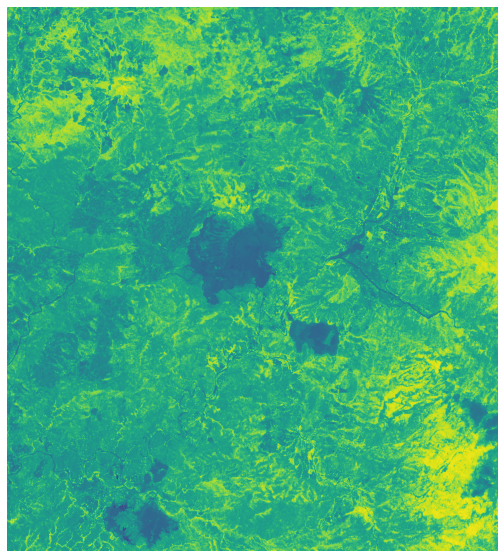

In [ ]:
#Create NDVI

plt.figure(figsize=(10,10))
plt.imshow(eopatch.data['indices'][3][...,0].squeeze());
plt.axis(False);

NDWI data

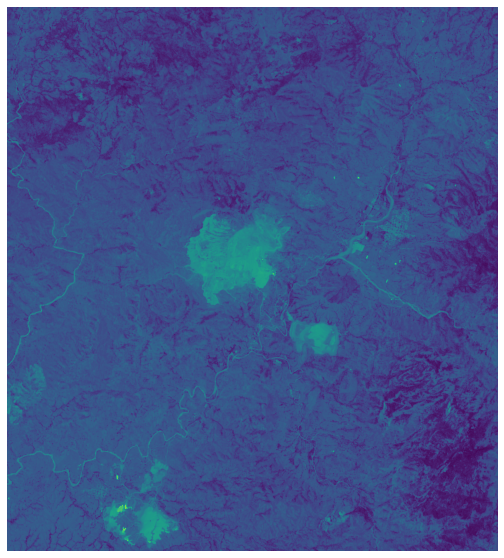

In [ ]:
# Create NDWI

plt.figure(figsize=(10,10))
plt.imshow(eopatch.data['indices'][0][...,1].squeeze());
plt.axis(False);

Sentinel-2 L2A RGB bands

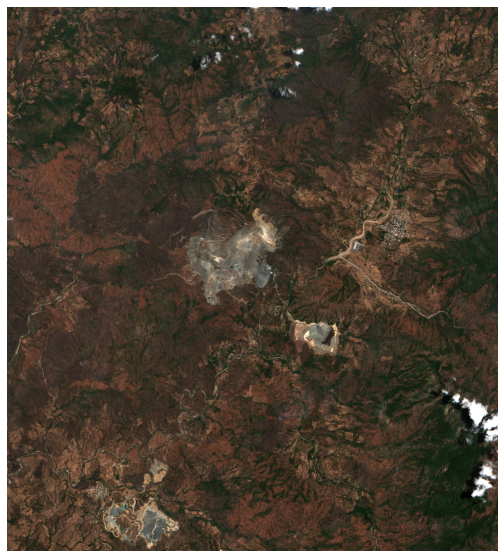

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.clip(eopatch.data['L2A_data'][3][...,[3,2,1]] * 2.5, 0, 1), vmin=0, vmax=1);
plt.axis(False);

Sentinel-2 Scene Classification Layer (from Sen2cor)


In [ ]:
from aenum import MultiValueEnum
from matplotlib.colors import ListedColormap, BoundaryNorm 

class SCL(MultiValueEnum):
    """ Enum class containing basic LULC types
    """
    NO_DATA = 'no data', 0, '#000000'
    SATURATED_DEFECTIVE = 'saturated / defective', 1, '#ff0004'
    DARK_AREA_PIXELS = 'dark area pixels', 2, '#868686'
    CLOUD_SHADOWS = 'cloud shadows', 3, '#774c0b'
    VEGETATION = 'vegetation', 4, '#10d32d'
    BARE_SOILS = 'bare soils', 5, '#ffff53'
    WATER = 'water', 6, '#0000ff'
    CLOUDS_LOW_PROBA = 'clouds low proba.', 7, '#818181'
    CLOUDS_MEDIUM_PROBA = 'clouds medium proba.', 8, '#c0c0c0'
    CLOUDS_HIGH_PROBA = 'clouds high proba.', 9, '#f2f2f2'
    CIRRUS = 'cirrus', 10, '#bbc5ec'
    SNOW_ICE = 'snow / ice', 11, '#53fffa'

    @property
    def rgb(self):
        return [c/255. for c in self.rgb_int]

    @property
    def rgb_int(self):
        hex_val = self.values[2][1:]
        return [int(hex_val[i: i + 2], 16) for i in (0, 2, 4)]

scl_bounds = [-0.5 + i for i in range(len(SCL)+1)]
scl_cmap = ListedColormap([x.rgb for x in SCL], name="scl_cmap")
scl_norm = BoundaryNorm(scl_bounds, scl_cmap.N)


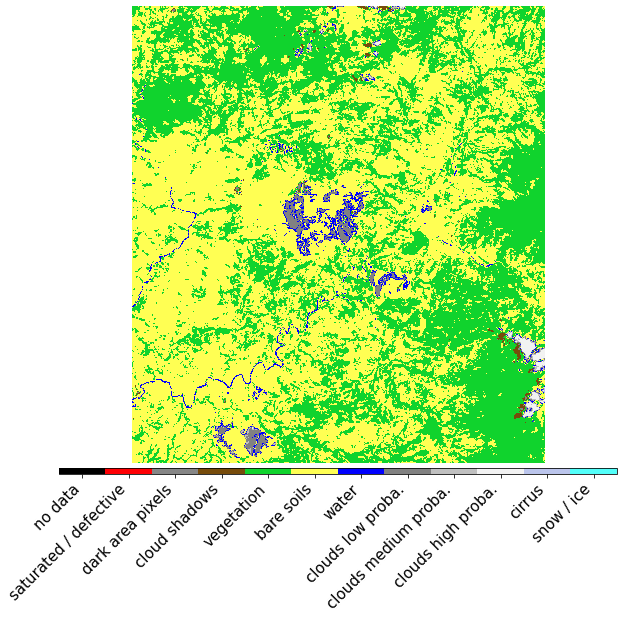

In [ ]:
#Plot Land Classification

fig, ax = plt.subplots(1,1,figsize=(10,10))
im = plt.imshow(eopatch.mask['SCL'][3].squeeze(), cmap=scl_cmap, norm=scl_norm);
plt.axis(False)

cb = fig.colorbar(im, orientation='horizontal', pad=0.01, aspect=100)
cb.ax.tick_params(labelsize=20)
cb.set_ticks([entry.values[1] for entry in SCL])
cb.ax.set_xticklabels([entry.values[0] for entry in SCL], rotation=45, fontsize=15, ha='right');

Mapzen Digital Elevation Model

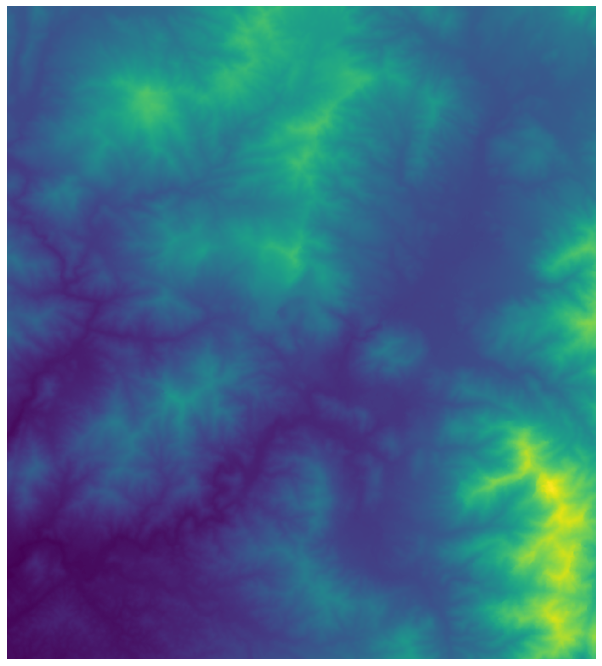

In [ ]:
#Create Digital Elevation Model


plt.figure(figsize=(12, 12))
plt.imshow(eopatch.data_timeless['dem'].squeeze());
plt.axis(False);

Load in saved eopatch


In [ ]:
load = LoadTask('io_penacolorada')

In [ ]:
new_eopatch = load.execute(eopatch_folder='eopatch')

In [ ]:
new_eopatch

EOPatch(
  data: {
    L1C_data: numpy.ndarray(shape=(17, 296, 263, 13), dtype=float32)
    L2A_data: numpy.ndarray(shape=(17, 296, 263, 12), dtype=float32)
    indices: numpy.ndarray(shape=(17, 296, 263, 2), dtype=float32)
  }
  mask: {
    SCL: numpy.ndarray(shape=(17, 296, 263, 1), dtype=uint8)
    dataMask: numpy.ndarray(shape=(17, 296, 263, 1), dtype=uint8)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {
    dem: numpy.ndarray(shape=(296, 263, 1), dtype=int16)
  }
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    maxcc: 0.1
    mosaicking_order: 'mostRecent'
    service_type: 'processing'
    size_x: 263
    size_y: 296
    time_difference: datetime.timedelta(0, 7200)
    time_interval: None
  }
  bbox: BBox(((-100.1743698, 20.7008762), (-100.124262, 20.7547068)), crs=CRS('4326'))
  timestamp: [datetime.datetime(2020, 5, 1, 17, 18, 7), ..., datetime.datetime(2020, 7, 23, 17, 28, 4)], length=17
)